In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))

    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [3]:
X, y = load_coffee_data();
print(X.shape, y.shape)
array = np.concatenate((X, y), axis=1)

(200, 2) (200, 1)


In [4]:
column_values = ['Temperature (Celsius)', 'Duration(minutes)', 'Roast']

In [5]:
df = pd.DataFrame(data = array, columns = column_values)

In [6]:
df.head()

,Temperature (Celsius),Duration(minutes),Roast
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0


<AxesSubplot: xlabel='Temperature (Celsius)', ylabel='Duration(minutes)'>

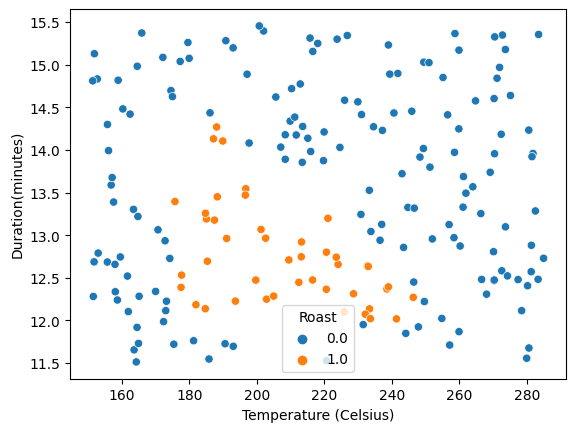

In [7]:
sns.scatterplot(x='Temperature (Celsius)', y = 'Duration(minutes)', hue = 'Roast', data=df)

In [8]:
df_x = df[['Temperature (Celsius)', 'Duration(minutes)']]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

In [10]:
data_scaled = np.concatenate((X_scaled, y), axis=1)
df_tiled = np.tile(data_scaled, (1000, 1))

In [11]:
df_st = pd.DataFrame(data = df_tiled, columns = column_values)

In [12]:
df_st.head()

,Temperature (Celsius),Duration(minutes),Roast
0,-0.834555,-0.652879,1.0
1,1.032306,-1.385145,0.0
2,0.308940,0.871626,0.0
3,-1.083568,-1.515484,0.0
4,-0.789431,0.619494,1.0


In [13]:
df_st.shape

(200000, 3)

<AxesSubplot: xlabel='Temperature (Celsius)', ylabel='Duration(minutes)'>

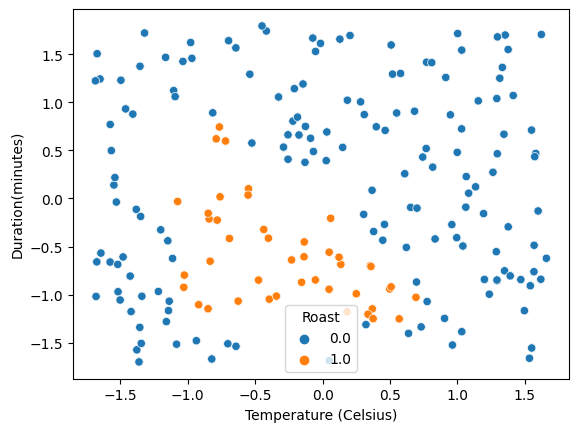

In [14]:
sns.scatterplot(x = 'Temperature (Celsius)', y = 'Duration(minutes)', hue = 'Roast', data= df_st )

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def my_dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = sigmoid(z)
    return(a_out)

In [17]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    return(a2)

##  Trained Weights and Biases

- W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
- b1_tmp = np.array( [-9.82, -9.28,  0.96] )
- W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
- b2_tmp = np.array( [15.41] )

In [18]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [19]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)

In [20]:
X_tst = np.array([
    [200,13.9],  
    [200,17]])
X_tstn = scaler.fit_transform(X_tst)
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [21]:
X_tstn

array([[ 0., -1.],
       [ 0.,  1.]])

In [22]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [23]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
